#Introduction

*Welcome to Saud Alballaa Project's which show the video games sales in worldwide, the corrleation between video games sales with other factors such as genra, reagion, and platform. In addition to the most sold and less sold games in specifc genra, reagion, platform, and year.*


---

**This project will use a [video games sales dataset](https://www.kaggle.com/gregorut/videogamesales) in kaggle**

The data set contain **11 featurs** and more than ***15000 records***



---

*The project will devide into two parts which are exploratory data analysis (EDA) and modling (mchine learning), using the following tools*:


*   Python as the programming language
*   Numpy and Pandas for all usages
*   Matplotlib and Seaborn for visualzation
*   Sketlearn for modling








#Import lib

In [ ]:
import numpy as np #Linear Algebra
import pandas as pd # Data processing


#Plot labraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Ml labraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#ML models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# To provide an upload button and upload the file in google colab
from google.colab import files
import io
data = files.upload()

Saving vgsales.csv to vgsales (2).csv


#Section One: Exploratory Data Analysis (EDA)

### Read the dataset


  ***Data Dectionary:***

*   Rank - Ranking of overall sales
*   Name - The games name
*   Platform - Platform of the games release (i.e. PC,PS4, etc.)
*   Year - Year of the game's release
*   Genre - Genre of the game
*   Publisher - Publisher of the game
*   NA_Sales - Sales in North America (in millions)
*   EU_Sales - Sales in Europe (in millions)
*   JP_Sales - Sales in Japan (in millions)
*   Other_Sales - Sales in the rest of the world (in millions)
*   Global_Sales - Total worldwide sales

In [ ]:
#Read the csv file
videoGames_df = pd.read_csv('vgsales.csv')

###Understanding and Preview The Data

In [ ]:
#Check the shape of the data to know the number of rows and columns 
videoGames_df.shape

(16598, 11)

In [ ]:
#Check the head of data set (which show the first 5 records in the data set)
videoGames_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#Check the tail of data set (which show the last 5 records in the data set)
videoGames_df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
#Taking overview with general information such as datatypes, and non values
videoGames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We can see there is null values in Publisher and Year

In [ ]:
#Taking statsical over view, and we can see that highest sales are in North amirca between the reagions by checking the max and mean
videoGames_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Notice that Na_Sales arth the highest sales between the reagions by checking the max and mean, also the data from 1980 to 2020

### Data Cleaning and Prepreation 


In [ ]:
# Check for dublications
duplicate = videoGames_df[videoGames_df.duplicated()]
duplicate

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [ ]:
# Check for null values
videoGames_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Check the precentage of the null value to the overall, if it's less than %5, I will drop it

#There is two ways to find out:

#videoGames_df.isnull().sum() * 100 / len(df)
videoGames_df.isnull().mean() * 100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [ ]:
#Drop the null rows because its very low precantge
videoGames_df = videoGames_df.dropna(axis=0, subset=['Year','Publisher'])

In [ ]:
#Recheck if the null values droped
videoGames_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
#Recheck the number of rows in the dataset
videoGames_df.shape

(16291, 11)

In [ ]:
#Recheck after removing the nulls
videoGames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
#Recheck after removing the nulls
videoGames_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


###EDA

####Which year had the highest relased games?

Text(0.5, 1.0, 'The highest year with relased games')

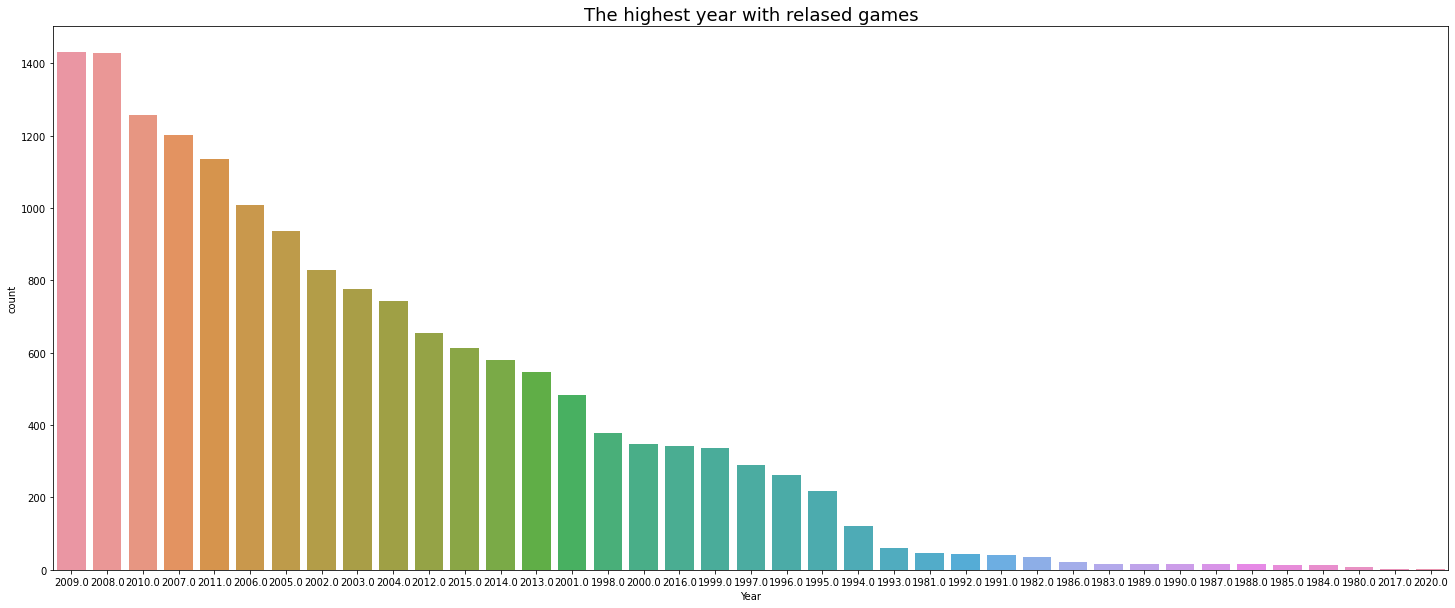

In [ ]:
#Check which year is the highest number of games that released
plt.figure(figsize=(25,10))
sns.countplot(x="Year", data=videoGames_df, order= videoGames_df['Year'].value_counts().index)
plt.title('The highest year with relased games', fontsize=18)

In [ ]:
#Show the same but by dataframe
videoGames_df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

The highest years with video games saled are 2008 and 2009

####Wihch year had the highest games sold?

In [ ]:
#Create a new dataframe that will store our new values by using the groupby and use it to visulize
highest_year=videoGames_df[["Year","Global_Sales"]].groupby("Year").sum()
highest_year = highest_year.reset_index()
#highest_year = highest_year.sort_values(by=['Global_Sales'], ascending=False)

Text(0.5, 1.0, 'The highest year with relased games')

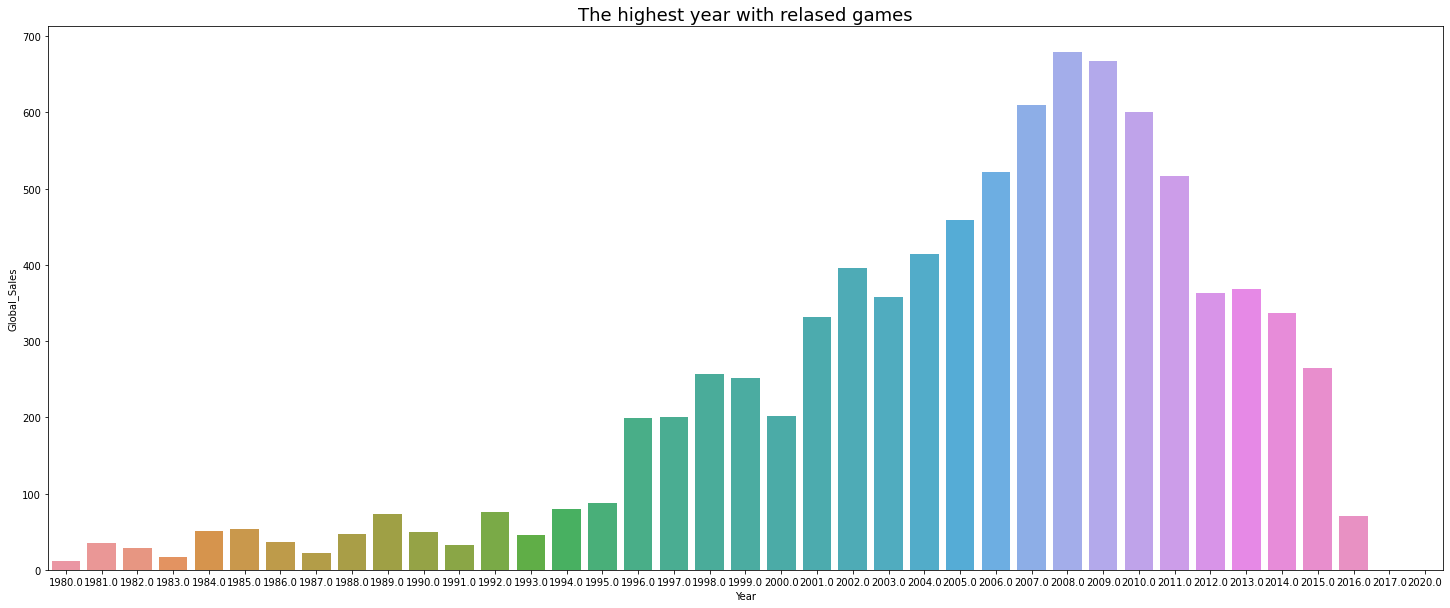

In [ ]:
#Check which year had the highest games sold 
plt.figure(figsize=(25,10))
sns.barplot(x="Year", y="Global_Sales", data=highest_year)
plt.title('The highest year with relased games', fontsize=18)

In [ ]:
#To check in the dataframe and compare
highest_year

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


The highest year that sold games globally is 2008

####What is the highest type of video games?

Text(0.5, 1.0, 'The sales of diffrent type of games in the global')

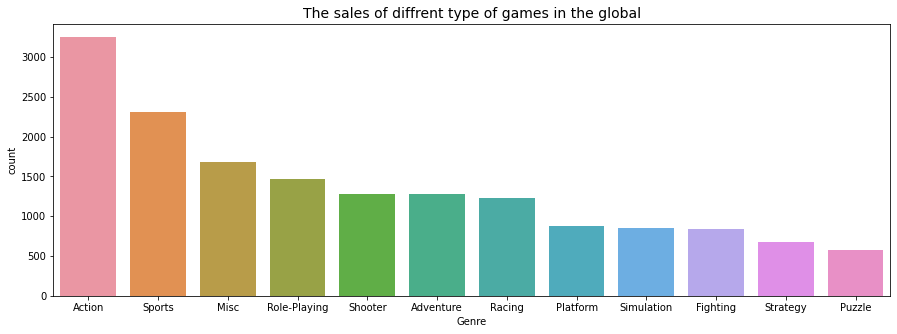

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Genre", data=videoGames_df, order= videoGames_df['Genre'].value_counts().index)
plt.title('The amount games for each type in the global', fontsize=14)

In [ ]:
#Show the same but by dataframe
videoGames_df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

The highest type of vidoe games are Action and Sports

####Which type of video games had the highest sold games?

In [ ]:
#Create a new dataframe that will store our new values by using the groupby and use it to visulize
highest_type=videoGames_df[["Genre","Global_Sales"]].groupby("Genre",sort = False).sum()
highest_type = highest_type.reset_index()
highest_type = highest_type.sort_values(by=['Global_Sales'], ascending=False)

Text(0.5, 1.0, 'The highest type of games sold')

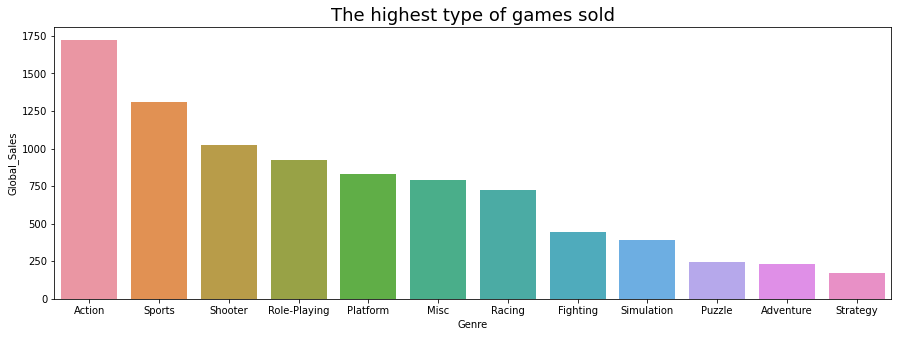

In [ ]:
#Check which type of games had the highest games sold 
plt.figure(figsize=(15,5))
sns.barplot(x="Genre", y="Global_Sales", data=highest_type)
plt.title('The highest type of games sold globally', fontsize=18)

In [ ]:
#To check in the dataframe and compare
highest_type

,Genre,Global_Sales
8,Action,1722.84
0,Sports,1309.24
6,Shooter,1026.20
3,Role-Playing,923.83
1,Platform,829.13
5,Misc,789.87
2,Racing,726.76
9,Fighting,444.05
7,Simulation,389.98
4,Puzzle,242.21


####Which platform had the highest games sold?

In [ ]:
#Create a new dataframe that will store our new values by using the groupby and use it to visulize
highest_platform=videoGames_df[["Platform","Global_Sales"]].groupby("Platform",sort = False).sum()
highest_platform = highest_platform.reset_index()
highest_platform = highest_platform.sort_values(by=['Global_Sales'], ascending=False)

Text(0.5, 1.0, 'The highest platfrom with sold games')

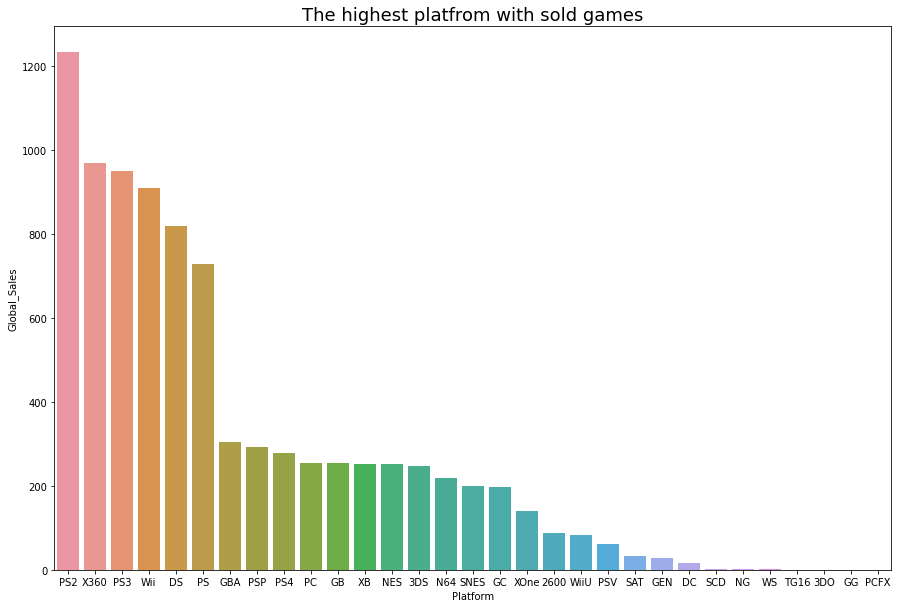

In [ ]:
#Check which platfrom  had the highest games sold 
plt.figure(figsize=(15,10))
sns.barplot(x="Platform", y="Global_Sales", data=highest_platform)
plt.title('The highest platfrom with sold games', fontsize=18)

In [ ]:
#To check in the dataframe and compare
highest_platform.head(10)

,Platform,Global_Sales
6,PS2,1233.46
4,X360,969.60
5,PS3,949.35
0,Wii,909.81
3,DS,818.91
12,PS,727.39
8,GBA,305.62
16,PSP,291.71
10,PS4,278.10
14,PC,254.70


The highest platform sold games is PS2

####Which publisher had the highest relased games?

Text(0.5, 1.0, 'Top 10 publisher that had relased games')

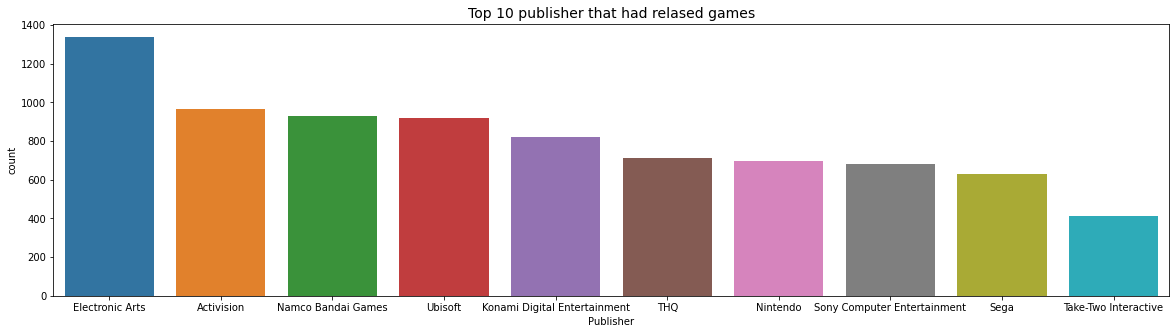

In [ ]:
#Vizulize the top 10 only
plt.figure(figsize=(20,5))
sns.countplot(x="Publisher", data=videoGames_df, order= videoGames_df.groupby(by=['Publisher'])['Year'].count()
.sort_values(ascending=False).iloc[:10].index)

plt.title('Top 10 publisher that had relased games', fontsize=14)

In [ ]:
#Check it on data frame and numric values
videoGames_df['Publisher'].value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

The highest publisher that had the highest relased games is Electronic Arts, which could be the reason of the sport games they have such as fifa 


####Which publisher had the highest sold games?

In [ ]:
#Create a new dataframe that will store our new values by using the groupby and use it to visulize
highest_publisher =videoGames_df[["Publisher","Global_Sales"]].groupby("Publisher",sort = False).sum()
highest_publisher = highest_publisher.reset_index()
highest_publisher = highest_publisher.sort_values(by=['Global_Sales'], ascending=False).iloc[:10]

Text(0.5, 1.0, 'Top 10 publisher with sales')

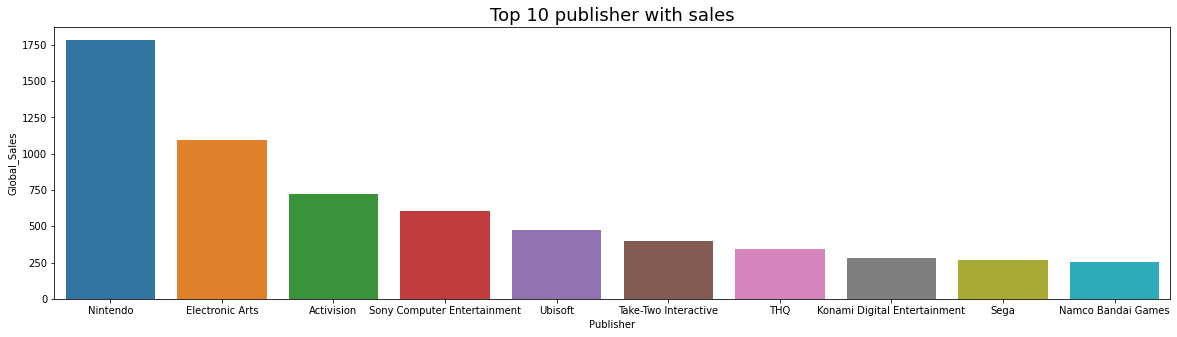

In [ ]:
#Check which publisher had the highest games sold (only top 10) 
plt.figure(figsize=(20,5))
sns.barplot(x="Publisher", y="Global_Sales", data=highest_publisher)
plt.title('Top 10 publisher with sales', fontsize=18)

In [ ]:
#Check for numrical data with dataframe
highest_publisher

,Publisher,Global_Sales
0,Nintendo,1786.56
7,Electronic Arts,1110.32
4,Activision,727.46
3,Sony Computer Entertainment,607.50
5,Ubisoft,474.72
2,Take-Two Interactive,399.54
28,THQ,340.77
14,Konami Digital Entertainment,283.64
8,Sega,272.99
25,Namco Bandai Games,254.09


Note that Nintendo has the highest sold games even though its the number 7 of released games!

####What are the precentages of regions sales to global sales?


In [ ]:
#Get all the region sales to new data frame to visulize it
regions_sales = videoGames_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
regions_sales = regions_sales.sum().reset_index()
regions_sales = regions_sales.rename(columns={"index": "regions", 0: "sales"})
#regions_sales

([<matplotlib.patches.Wedge at 0x7f0fdc1bd890>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

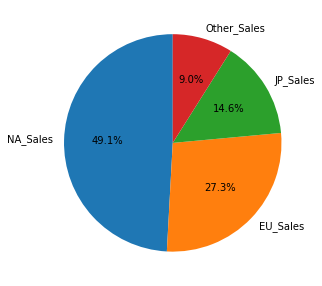

In [ ]:
#autopct to set the precentages, startangle to set the rotation of the pie
plt.figure(figsize=(10, 5))
plt.pie(regions_sales['sales'], labels=regions_sales['regions'], autopct='%1.1f%%',  startangle=90)

####Determine the best features suited for the model to predict global sales 


I will use three things to help me determine the best features and its corrleation, which are: pair plot, heatmap, and corr function

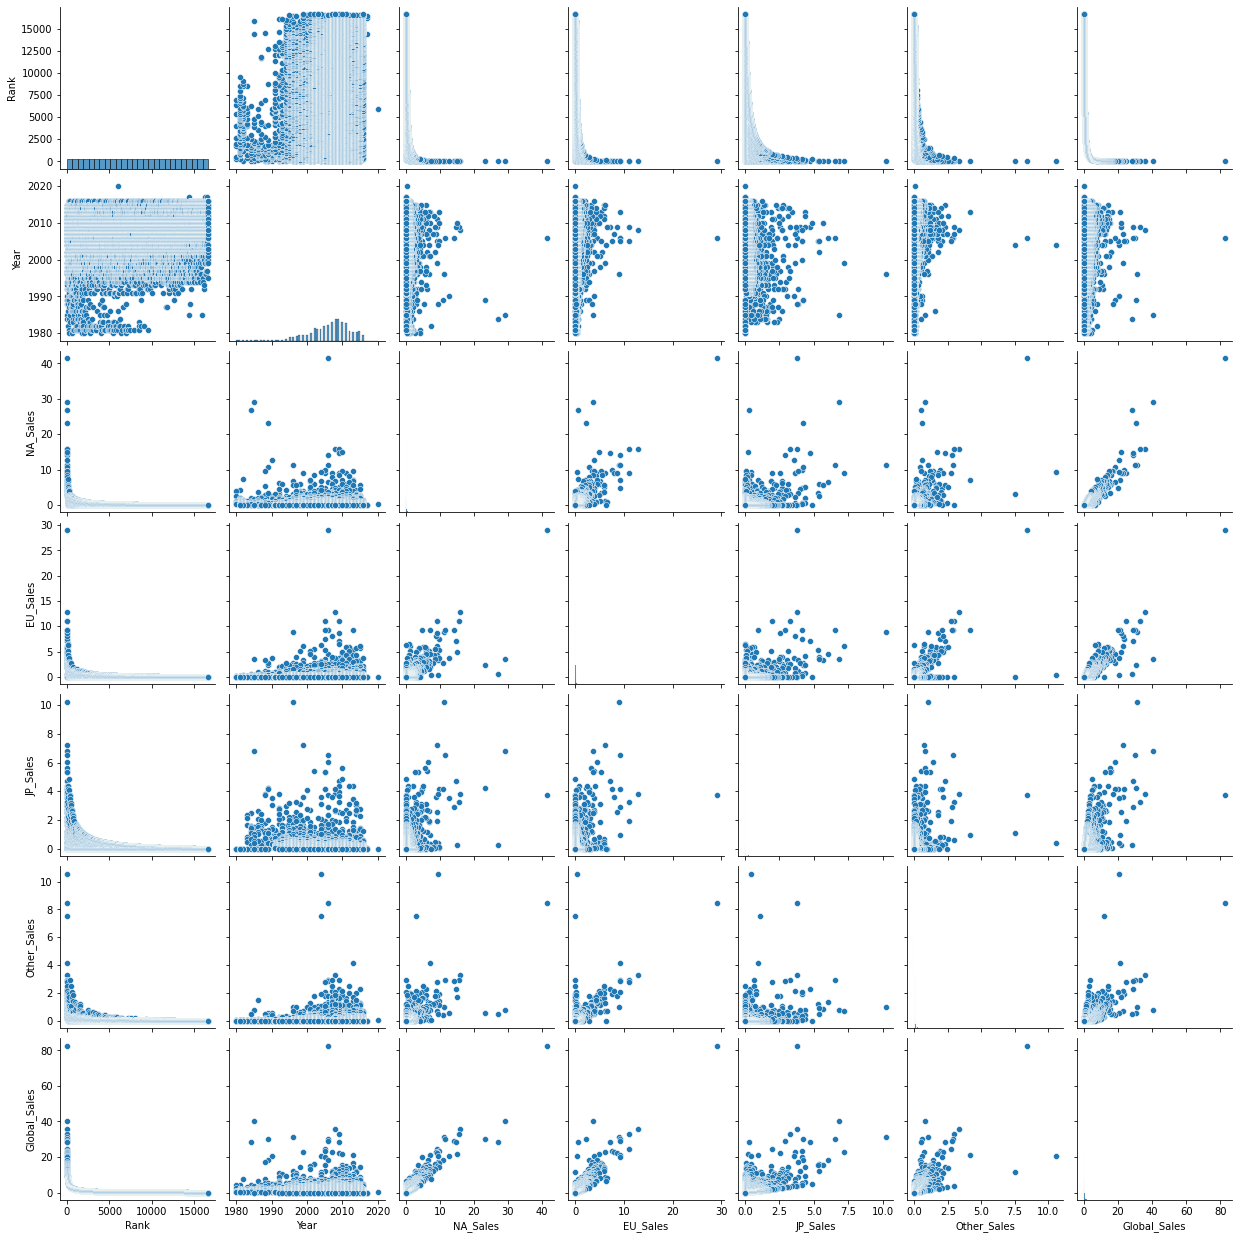

In [ ]:
sns.pairplot(videoGames_df)

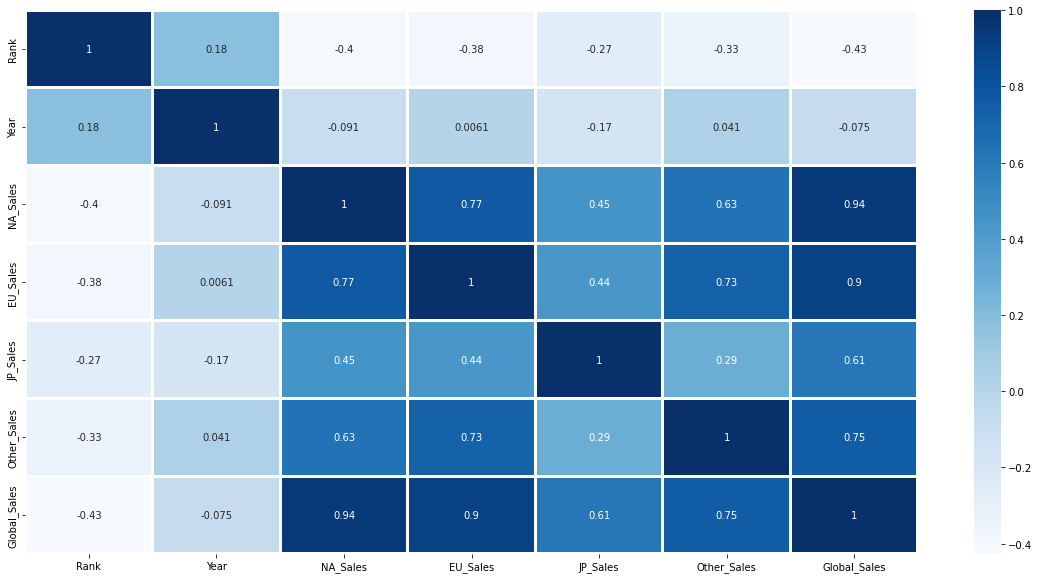

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(videoGames_df.corr(), cmap = "Blues", annot=True, linewidth=2)

In [ ]:
videoGames_df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


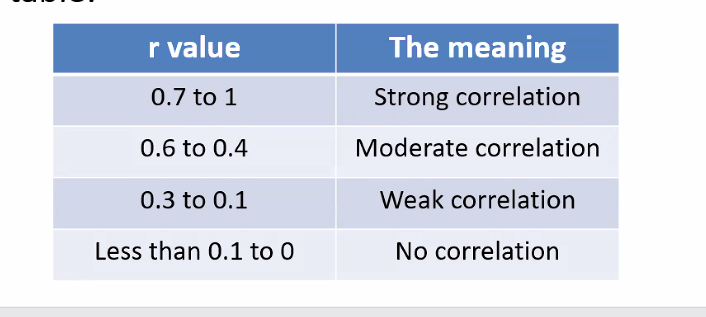

As the picutre show: Na_sales, Eu_sales,Other_sales are storng postive correlation. Jp_Sales is modreate postive correlation. And Genre and platform have no correlation with global_sales.

#Section Two: Machine learning (Modeling)

####Encoding Genre and Platfrom

In [ ]:
#Save my coulmns that I want to encode
feature = ["Platform", "Genre"]

In [ ]:
#Use the dummies() to encode the two columns from string to numric value
#The reason that we used dummies and not label encoder because genre and platfrom are not orgniezed values
final_data = pd.get_dummies(videoGames_df,columns=feature,drop_first=True)

In [ ]:
#Check general infromation after the encoding
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                16291 non-null  int64  
 1   Name                16291 non-null  object 
 2   Year                16291 non-null  float64
 3   Publisher           16291 non-null  object 
 4   NA_Sales            16291 non-null  float64
 5   EU_Sales            16291 non-null  float64
 6   JP_Sales            16291 non-null  float64
 7   Other_Sales         16291 non-null  float64
 8   Global_Sales        16291 non-null  float64
 9   Platform_3DO        16291 non-null  uint8  
 10  Platform_3DS        16291 non-null  uint8  
 11  Platform_DC         16291 non-null  uint8  
 12  Platform_DS         16291 non-null  uint8  
 13  Platform_GB         16291 non-null  uint8  
 14  Platform_GBA        16291 non-null  uint8  
 15  Platform_GC         16291 non-null  uint8  
 16  Plat

In [ ]:
final_data.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,Wii Sports,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Mario Kart Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


####Split the train and test

In [ ]:
#Defin X and y
X = final_data.drop(['Rank','Year','Publisher','Name','Global_Sales'],axis=1)
y = final_data['Global_Sales']
#X
#y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)
#X_train

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
1688,0.45,0.47,0.00,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
661,1.46,0.54,0.01,0.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3758,0.26,0.20,0.00,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12416,0.00,0.05,0.00,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7350,0.15,0.06,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,0.00,0.00,0.04,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5474,0.25,0.07,0.00,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
870,1.09,0.65,0.02,0.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
16087,0.00,0.00,0.01,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


####Note that I don't have to future scaling because they all the same unit

####Modeling

#####LinearRegression

In [ ]:
#Cread instance and fit the train set
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predict the X_test
pred = lr.predict(X_test)
pred

array([0.5703381 , 0.06057486, 0.1901436 , ..., 0.09009976, 0.13062835,
       0.18035129])

In [ ]:
#To comapre with predection
y_test

3527     0.57
12216    0.07
7940     0.19
3030     0.67
7144     0.22
         ... 
13781    0.04
15964    0.02
11193    0.09
9400     0.13
7979     0.19
Name: Global_Sales, Length: 3259, dtype: float64

Look so close

In [ ]:
#Check the y-intercept
print('y-intercept:', lr.intercept_)

y-intercept: 0.00047916522496482816


In [ ]:
#Check the coefficients
print('coefficients: \n', lr.coef_)


coefficients: 
 [ 9.99889407e-01  9.99814377e-01  1.00025063e+00  9.99680808e-01
 -5.97548981e-04 -3.14354126e-04  4.20940054e-05 -3.29445775e-05
 -6.40764473e-04  4.52919575e-04  3.49932275e-04  7.82643339e-05
 -6.87784970e-04  3.18300287e-04 -5.84663038e-04 -3.07818001e-04
  4.44218612e-04 -4.04160342e-04 -4.46617045e-04 -3.62983980e-04
 -3.94153178e-04 -5.46213960e-04 -3.67369381e-04 -3.83184541e-04
 -4.51841858e-04  1.23537983e-03 -4.13029107e-04 -4.52734623e-04
 -4.69924232e-04  6.57308460e-05  9.81089093e-05 -1.01337141e-04
  3.54700504e-04 -4.00284546e-04 -1.45501554e-04 -2.09227456e-04
 -6.08693114e-05  1.98594657e-04  5.11576859e-04 -1.71613921e-04
 -8.25236989e-05  5.25399966e-05 -3.59867585e-05 -1.38410443e-04
 -2.93941796e-05]


####Evaluating

In [ ]:
#The R2 train score
lr.score(X_train,y_train)

0.999986600954359

In [ ]:
#adjusted R2 score for training set
adjusted_r_squared = 1 - (1-lr.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.9999865638378891

In [ ]:
#The R2 test score
lr.score(X_test,y_test)

0.9999933052957081

In [ ]:
#adjusted R2 for testing set
adjusted_r_squared_1 = 1 - (1-(r2_score(y_test, pred)))*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared_1

0.9999932867508209

Fitting